In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import resources
import testing_main as tm
import matplotlib.pyplot as plt
import numpy as np

# %load_ext autoreload
# %autoreload 2

# import matplotlib as mpl
# mpl.use('TkAgg')
%matplotlib inline

# Testing Main Notebook

`testing_main.py` contains multiple functions:
- `main()`: choose an exp to load in, update and save it.
- `update(exp)`: update exp with new data, and display nc4.
- `check_ae(exp)`: plot last file of AE data in test.
- `check_nc4(exp)`: calc last NC4 file attributes and plot results.

No existing exp file selected!
----------------------TESTING EXP FILE----------------------
Test No: 15
Date: 2024-06-19
Data: ..\..\Testing\24_06_19_weartest_D1.3_#1000
No. Files: AE-141 NC4-142
------------------------------------------------------------
------------------------------------------------------------
NC4 - File 141:
	Mean radius = 0.623457 mm
	Runout = 5.038 um
	Wear = -6.507 %
------------------------------------------------------------


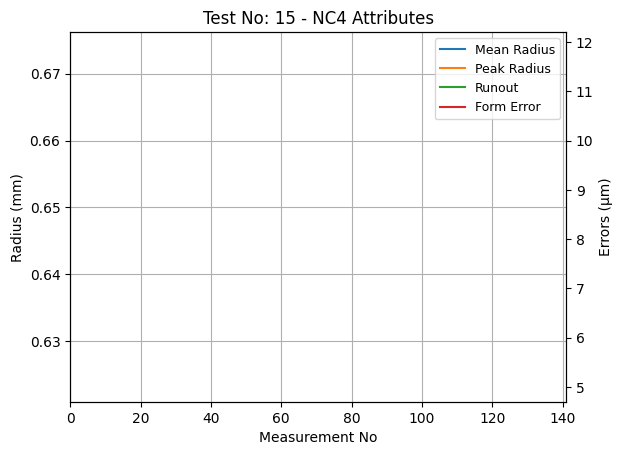

In [10]:
exp = tm.main()

------------------------------------------------------------
NC4 - File 141:
	Mean radius = 0.623457 mm
	Runout = 5.038 um
	Wear = -6.507 %
------------------------------------------------------------


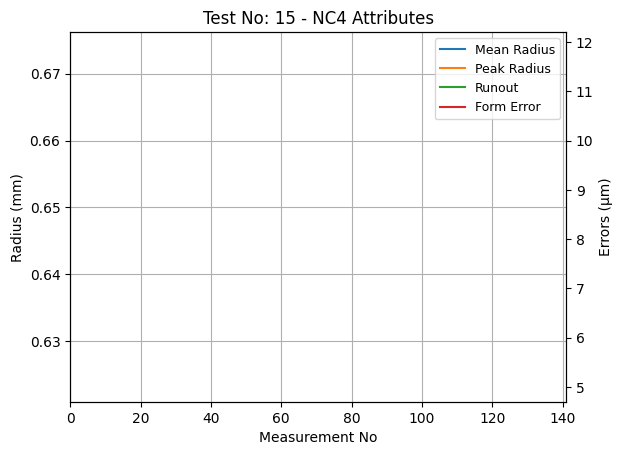

In [11]:
f = tm.update(exp)

In [ ]:
tm.check_ae(exp)

In [12]:
exp.nc4.process()

NC4- Calc att: 100%|██████████| 142/142 [00:04<00:00, 29.23it/s]


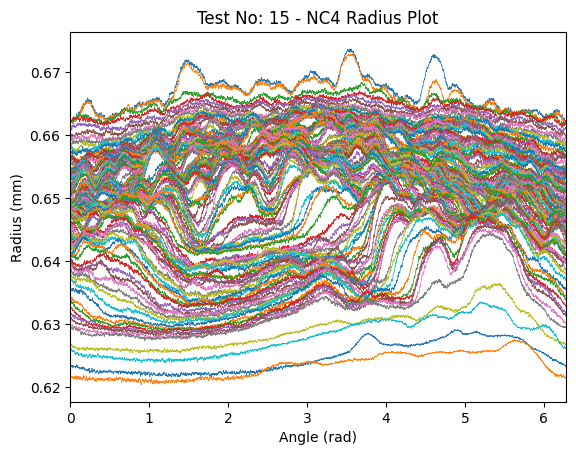

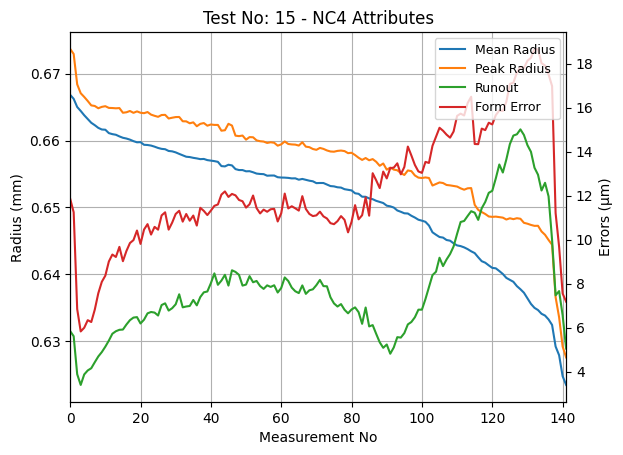

In [13]:
f = exp.nc4.plot_xy()
f = exp.nc4.plot_att()

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Test No: 15 - NC4 Radius Surface'}, xlabel='Angle (rad)', ylabel='Measurement Number'>)

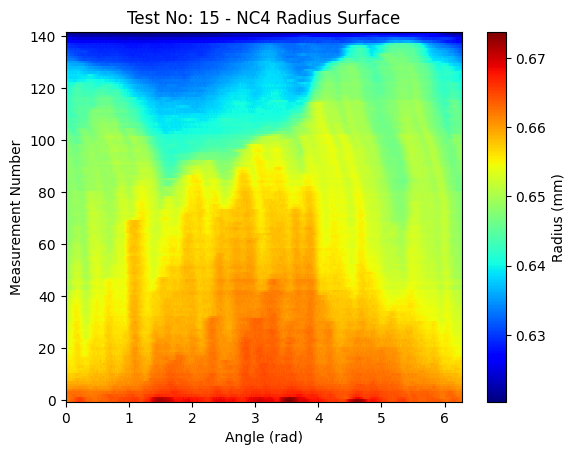

In [14]:
exp.nc4.plot_surf()

In [15]:
exp.save()

### Extra Processing - Wait till CUSP

In [16]:
exp.ae.process()

Calc FFT 1 kHz: 100%|██████████| 141/141 [01:19<00:00,  1.78it/s]


In [17]:
exp.create_feat_df()

Feature DF of Test 15:
        RMS   Kurtosis  Amplitude  Skewness  Freq 10 kHz  Freq 35 kHz  \
0  0.058963   9.965130   1.351834  0.001242    29.203723    37.520982   
1  0.787169  12.847367  12.686632  0.288732    31.186528    61.437760   
2  1.131545   8.744909  14.642187  0.378224    32.112618    70.097515   
3  1.159909   6.799942  12.762988  0.150371    32.541605    70.247169   
4  1.142263   6.183395  11.091052  0.095753    32.888801    69.493256   

   Freq 134 kHz  Mean radius  Peak radius  Radius diff    Runout  Form error  
0     19.455013     0.666254     0.672963    -0.000593  0.005611    0.011248  
1     42.528248     0.665032     0.668426    -0.001222  0.003886    0.006846  
2     46.568351     0.664438     0.667090    -0.000593  0.003397    0.005829  
3     47.652290     0.663795     0.666534    -0.000644  0.003874    0.005997  
4     47.971155     0.663227     0.665926    -0.000568  0.004055    0.006341  


,RMS,Kurtosis,Amplitude,Skewness,Freq 10 kHz,Freq 35 kHz,Freq 134 kHz,Mean radius,Peak radius,Radius diff,Runout,Form error
0,0.058963,9.965130,1.351834,0.001242,29.203723,37.520982,19.455013,0.666254,0.672963,-0.000593,0.005611,0.011248
1,0.787169,12.847367,12.686632,0.288732,31.186528,61.437760,42.528248,0.665032,0.668426,-0.001222,0.003886,0.006846
2,1.131545,8.744909,14.642187,0.378224,32.112618,70.097515,46.568351,0.664438,0.667090,-0.000593,0.003397,0.005829
3,1.159909,6.799942,12.762988,0.150371,32.541605,70.247169,47.652290,0.663795,0.666534,-0.000644,0.003874,0.005997
4,1.142263,6.183395,11.091052,0.095753,32.888801,69.493256,47.971155,0.663227,0.665926,-0.000568,0.004055,0.006341
...,...,...,...,...,...,...,...,...,...,...,...,...
136,1.182314,7.442039,21.045360,-0.078222,35.188604,70.412360,52.999186,0.632426,0.644426,-0.000819,0.009996,0.016986
137,1.168079,8.647615,14.029605,-0.097624,35.037384,69.623992,52.630562,0.629201,0.636575,-0.003224,0.007471,0.011213
138,1.170389,8.262432,16.219510,-0.044218,35.153497,69.884137,52.222580,0.627896,0.633561,-0.001306,0.007664,0.009678
139,1.058355,7.776425,14.715990,-0.077389,35.361441,69.099276,52.201958,0.624755,0.629195,-0.003140,0.006563,0.007552


In [18]:
exp.save()

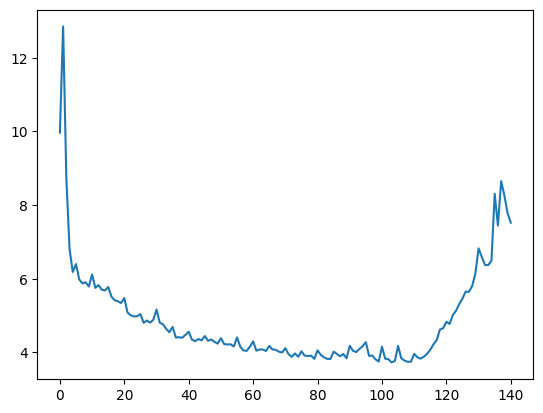

In [19]:
plt.plot(exp.features['Kurtosis'])

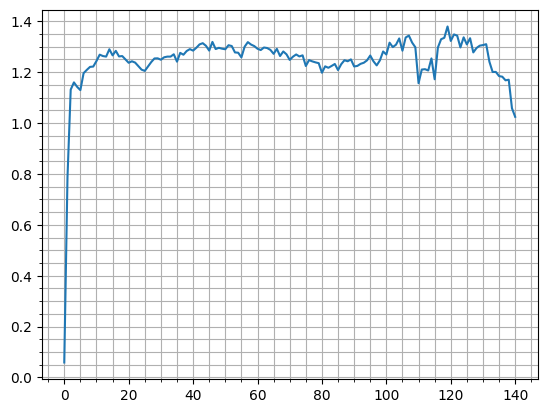

In [20]:
plt.plot(exp.features['RMS'])
plt.minorticks_on()
plt.grid(True, which='both')

In [21]:
nc4_df = exp.features.loc[:, ['Mean radius', 'Peak radius', 'Runout', 'Form error']]
nc4_df.head()
nc4_df.to_csv(fr'{exp.dataloc}\NC4Data.csv')